## Neural ODEs

### Residual Neural Network (ResNet)
- ResNet is proposed in this paper:
He, Zhang, Ren, and Sun (2016). Deep Residual Learning for Image Recognition. 2016. CVPR (cited >150k).

- Motivation: vanishing gradient problem when the number of layers is too large

- Original Feedforward Neural Network:
$$
\begin{aligned}
z^{(1)} &= x, \\
z^{(i+1)} &= \sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L, \\
y &= W^{(L+1)} z^{(L+1)} + b^{(L+1)}
\end{aligned}
$$

- ResNet:
$$
\begin{aligned}
z^{(1)} &= x, \\
z^{(i+1)} &= z^{(i)} + \sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L, \\
y &= W^{(L+1)} z^{(L+1)} + b^{(L+1)}
\end{aligned}
$$

### Connections with ODEs

We can rewrite ResNet as
$$
\frac{z^{(i+1)} - z^{(i)}}{\Delta t} = \frac{1}{\Delta t}\sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L,
$$
Or equivalently
$$
\frac{z^{(i+1)} - z^{(i)}}{\Delta t} = V(z^{(i)}; W^{(i)}, b^{(i)}), \quad i=1,2,\cdots,L,
$$
with
$$
V(z^{(i)}; W^{(i)}, b^{(i)}) = \frac{1}{\Delta t}\sigma(W^{(i)} z^{(i)} + b^{(i)})
$$

### ODE problem
Let us consider the ODE system:
$$
\frac{dz}{dt} = V(z,t)
$$
with the initial condition
$$
z(0) = z_0
$$
We want to solve this problem to find $z(T)$.

### Euler method
The Euler method is a numerical method to find the approximate solution of $z(T)$:

We uniformly divide the time domain $[0, T]$ with a time step $\Delta t$ and temporal nodes $t^{(l)} = l\Delta t$ for $0\le l\le L$, where $L = T/\Delta t$. We use the notation $z^{(l)}$ to denote the approximation to $z(t^{(l)})$. Then we approximate the ODE by
$$
\frac{z^{(l+1)} - z^{(l)}}{\Delta t} = V(z^{(l)}, t^{(l)})
$$
or equivalently
$$
z^{(l+1)} = z^{(l)} + \Delta t V(z^{(l)}, t^{(l)})
$$
and
$$
z^{(0)} = z_0
$$

As $\Delta t$ goes to zero, the numerical solution will converge to the true solution.

### Use Euler method to solve ODE

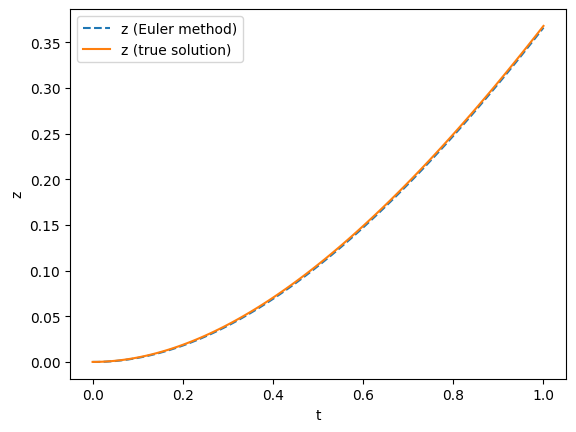

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler method to solve ODE

# Define the differential equation
# dz/dt = t - z
def f(t, z):
    return t - z

# Define the initial condition
z0 = 0.

# true solution
# z = exp(-t) + t - 1

# Define the final time T
T = 1.

# Define the step size
delta_t = 0.01

# Define the number of steps
L = int(T/delta_t)

t_array = np.linspace(0., T, L+1)

z_array = np.zeros_like(t_array)

# Initialize the solution
z_array[0] = z0

# Solve the ODE
for i in range(L):
    
    # Use Euler method to compute the next step
    z_array[i+1] = z_array[i] + delta_t * f(delta_t * i, z_array[i])

# true solution
# z = exp(-t) + t - 1
z_true = np.exp(-t_array) + t_array - 1.0

# plot the solution by Euler method and the true solution
fig = plt.figure()
plt.xlabel('t')
plt.ylabel('z')
plt.plot(t_array, z_array, '--', label='z (Euler method)')
plt.plot(t_array, z_true, '-', label='z (true solution)')
plt.legend()


### Connection between ResNet and ODEs

ResNet is nothing but a descritization of ODEs.

First:
- In a fully trained ResNet we are given $z(0)$ and the weights of a network, and we predict $z(L+1)$.
- In a system of ODEs, we are given $z(0)$ and $V(z, t)$, and we predict $z(T)$.

Second:
- Training the ResNet means determining the parameters of the network so that $z(L+1)$ is as close as possible to $y$ from data.
- When viewed from the analogous ODE point of view, training means determining the right hand side $V(x, t)$ by requiring $x(T)$ to be as close as possible to $y$ from data.

### Neural ODEs

Motivated by the connection between ResNets and ODEs, neural ODEs were proposed in (https://arxiv.org/abs/1806.07366). This paper has been cited by more than 2900 times since 2018.

Consider a system of ODEs given by
$$
\frac{dz}{dt} = V(z, t; \theta)
$$
Given $z(0)$, we wish to find $z(T)$. In Neural ODEs, the RHS, i.e., $V (z, t; \theta)$, is defined using a feed-forward neural network with parameters $\theta$. The input to the network is $(z, t)$ while the output is $V(z, t; \theta)$ (having the same dimension as $z$). With this description, the ODE system is solved using a suitable time-marching scheme, such as forward Euler, Runge-Kutta, etc.

### Use neural ODEs to solve regression problem

Assume that you are given the labelled training data $S = \{(x_i, y_i) : 1 ≤ i ≤ N_{train}\}$. Here both $x_i$ and $y_i$ are assumed to have the same dimension $d$. The key idea is to think of $x_i$ as points in the $d$-dimensional space that represent the initial state of the ODE system $z(0)$, and to think of $y_i$ as points that represent the final state $z(T)$. Then the regression problem becomes finding the RHS of the ODE $V(z,t;\theta)$ that will map the initial points to the final points with minimal amount of error. In other words, find the parameters $\theta$ such that
$$
\mathcal{L}(\theta) = \frac{1}{N}\sum_{i=1}^N (x_i(T;\theta) - y_i)^2
$$
is minimized.

Here $x_i(T;\theta)$ denotes the solution at final time $t=T$ with $z(0)=x_i$.

When $x_i$ and $y_i$ have different dimensions, there is a relatively straightforward way of extending this approach, e.g., use a feedforward neural network.

Iter    0 | Total Loss 1.493306
Iter  100 | Total Loss 0.300346
Iter  200 | Total Loss 0.244060
Iter  300 | Total Loss 0.255712
Iter  400 | Total Loss 0.203097
Iter  500 | Total Loss 0.321814
Iter  600 | Total Loss 0.457505
Iter  700 | Total Loss 0.220470
Iter  800 | Total Loss 0.149230
Iter  900 | Total Loss 0.274894
Iter 1000 | Total Loss 0.235432
Iter 1100 | Total Loss 0.167703
Iter 1200 | Total Loss 0.170244
Iter 1300 | Total Loss 0.303580
Iter 1400 | Total Loss 0.200101
Iter 1500 | Total Loss 0.437848
Iter 1600 | Total Loss 0.134109
Iter 1700 | Total Loss 0.230247
Iter 1800 | Total Loss 0.390532
Iter 1900 | Total Loss 0.109252


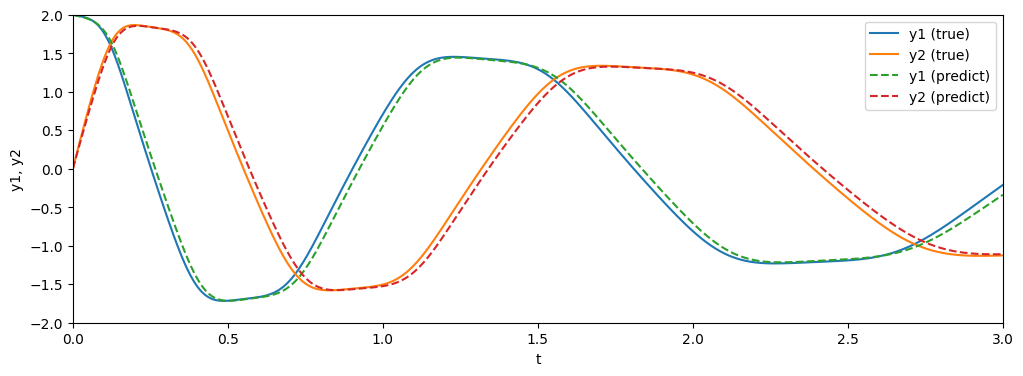

In [2]:
# This example is adapted from the package in https://github.com/rtqichen/torchdiffeq
# You should first install the package by the command
# pip install torchdiffeq

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchdiffeq import odeint_adjoint as odeint

# initial condition for ODE
# y1(0) = 2
# y2(0) = 0
true_y0 = torch.tensor([[2., 0.]])

# time t is in the range from 0 to 3
t = torch.linspace(0., 3., 1000)

true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]])

# True ODE we want to solve
# 
# y1' = -0.1 * y1^3 + 2 * y2^3
# y2' = -2 * y1^3 - 0.1 * y2^3
class Lambda(nn.Module):

    def forward(self, t, y):
        return torch.mm(y**3, true_A)

# Solve ODE
with torch.no_grad():
    true_y = odeint(Lambda(), true_y0, t, method='dopri5')

# take batch data from the solution
def get_batch():
    s = torch.from_numpy(np.random.choice(np.arange(1000 - 10, dtype=np.int64), 20, replace=False))
    batch_y0 = true_y[s]  # (M, D)
    batch_t = t[:10]  # (T)
    batch_y = torch.stack([true_y[s + i] for i in range(10)], dim=0)  # (T, M, D)
    return batch_y0, batch_t, batch_y

# neural network to approximate the right-hand-side of the ODE
class ODEFunc(nn.Module):

    def __init__(self):
        super(ODEFunc, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(2, 100),
            nn.Tanh(),
            nn.Linear(100, 2),            
        )

        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.1)
                nn.init.constant_(m.bias, val=0)

    def forward(self, t, y):
        return self.net(y**3)


ii = 0

func = ODEFunc()

optimizer = optim.RMSprop(func.parameters(), lr=1e-3)

# number of epochs
niters = 2000
for itr in range(niters):
    
    optimizer.zero_grad()
    
    batch_y0, batch_t, batch_y = get_batch()
    
    # solve the ODE using the default solver
    pred_y = odeint(func, batch_y0, batch_t)
    
    loss = torch.mean(torch.abs(pred_y - batch_y))
    loss.backward()
    optimizer.step()

    if itr % 100 == 0:
        with torch.no_grad():
            pred_y = odeint(func, true_y0, t)
            loss = torch.mean(torch.abs(pred_y - true_y))
            print('Iter {:4d} | Total Loss {:.6f}'.format(itr, loss.item()))
            ii += 1

# plot
pred_y = odeint(func, true_y0, t)    

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4), facecolor='white')

plt.xlabel('t')
plt.ylabel('y1, y2')
plt.plot(t.numpy(), true_y.numpy()[:, 0, 0], '-', label='y1 (true)')
plt.plot(t.numpy(), true_y.numpy()[:, 0, 1], '-', label='y2 (true)')
plt.plot(t.numpy(), pred_y.detach().numpy()[:, 0, 0], '--', label='y1 (predict)')
plt.plot(t.numpy(), pred_y.detach().numpy()[:, 0, 1], '--', label='y2 (predict)')
plt.xlim(t.cpu().min(), t.cpu().max())
plt.ylim(-2, 2)
plt.legend()


### Optimization

See more details in the paper "Neural Ordinary Differential Equations" (https://arxiv.org/abs/1806.07366)

Consider optimizing a scalar-valued loss function $L()$:
$$
L(z(T)) = L(z(0) + \int_0^T V(z(t),t;\theta)dt)
$$

To optimize $L$, we need to compute the gradients with $\theta$, i.e. $\frac{\partial L}{\partial \theta}$.

The first step is to determine how the gradient of the loss depends on $z(t)$ at each instant. This quantity is called the adjoint state
$$
a(t) = \frac{\partial L}{\partial z(t)}
$$
Its dynamics are given by another ajoint ODE, which can be thought of as the instantaneous analog of the chain rule:
$$
\frac{da}{dt} = -a(t)^T \frac{\partial V(z(t), t, \theta)}{\partial z}
$$

The second step is to compute the gradients with respect to the parameters $\theta$ requires evaluating a third integral, which depends on both $z(t)$ and $a(t)$
$$
\frac{dL}{d\theta} = -\int_0^T a(t)^T \frac{\partial V(z(t), t, \theta)}{\partial \theta} dt
$$